# Classificação binária

A classificação binária é a tarefa de classificar os elementos de um conjunto em um de dois grupos, como por exemplo 0 ou 1, verdadeiro ou falso

## Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# sequential serve para montar uma rede
from keras.models import Sequential

# dense serve para você adicionar as camadas de configuração
from keras.layers import Dense

## Leitura e pré-manipulação dos dados

A pré-manipulação dos dados é essencial para o treinamento de modelos de machine learning. Ela garante que os dados estejam limpos e no formato adequado, permitindo que o treinamento seja mais preciso e eficaz, além de evitar erros e melhorar o desempenho do modelo.

In [ ]:
# Lendo o arquivo csv
dataset = pd.read_csv('diabetes.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Vendo colunas aleatórias

Vamos ver algumas colunas aleatórias para ter uma noção dos dados e entender o que precisamos para treinar os nossos modelos

In [ ]:
dataset.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,1,81,74,41,57,46.3,1.096,32,0
660,10,162,84,0,0,27.7,0.182,54,0
733,2,106,56,27,165,29.0,0.426,22,0
533,6,91,0,0,0,29.8,0.501,31,0
439,6,107,88,0,0,36.8,0.727,31,0
73,4,129,86,20,270,35.1,0.231,23,0
263,3,142,80,15,0,32.4,0.200,63,0
254,12,92,62,7,258,27.6,0.926,44,1
289,5,108,72,43,75,36.1,0.263,33,0
68,1,95,66,13,38,19.6,0.334,25,0


Podemos observar que a coluna "Outcome" é nossa variável alvo, pois indica se a pessoa é diabética (1) ou não (0).

As colunas do dataset representam as seguintes informações:

- **Pregnancies**: Número de vezes que a pessoa engravidou
- **Glucose**: Concentração plasmática de glicose após 2 horas em um teste oral de tolerância à glicose
- **BloodPressure**: Pressão arterial diastólica (mm Hg)
- **SkinThickness**: Espessura da prega cutânea do tríceps (mm)
- **Insulin**: Nível de insulina sérica (U/ml)
- **BMI**: Índice de Massa Corporal (IMC)
- **DiabetesPedigreeFunction**: Função de Pedigree para Diabetes (mede a predisposição genética)
- **Age**: Idade
- **Outcome**: Resultado (0 = Não diabético, 1 = Diabético)

O que também conseguimos verificar dos dados é que eles já estão em um bom formato para treinar nosso modelo, todas as colunas estão no tipo numérico e sem nenhum dado faltante

## Exibição de gráficos

Algo muito importante para definir quais são as melhores colunas para usarmos no treinamento do nosso modelo é a exibição de gráficos que mostra a correlação das nossas colunas com a coluna "alvo"

Abaixo foi usados duas formas que conseguirmos essas informações e vou explicar cada uma delas e além disso quais colunas foram escolhidas e porque

### Mapa de calor (heatmap)

Aqui fazemos uma matriz de correlação para verificar quais campos tem uma forte correlação com a nossa coluna alvo

<Axes: >

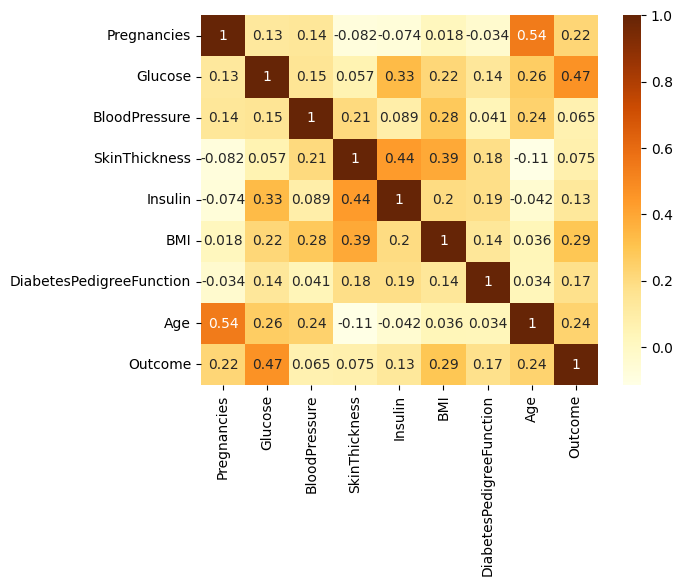

In [ ]:
plt = sns.heatmap(dataset.corr(), cmap='YlOrBr',annot=True )
plt

Após ver os gráficos podemos identificar que algumas colunas como BMI, Age, Pregnancies e principalmente Glucose tem uma alta relação com a nossa coluna alvo

### Boxplot para cada coluna para esclarecer nossa dúvida

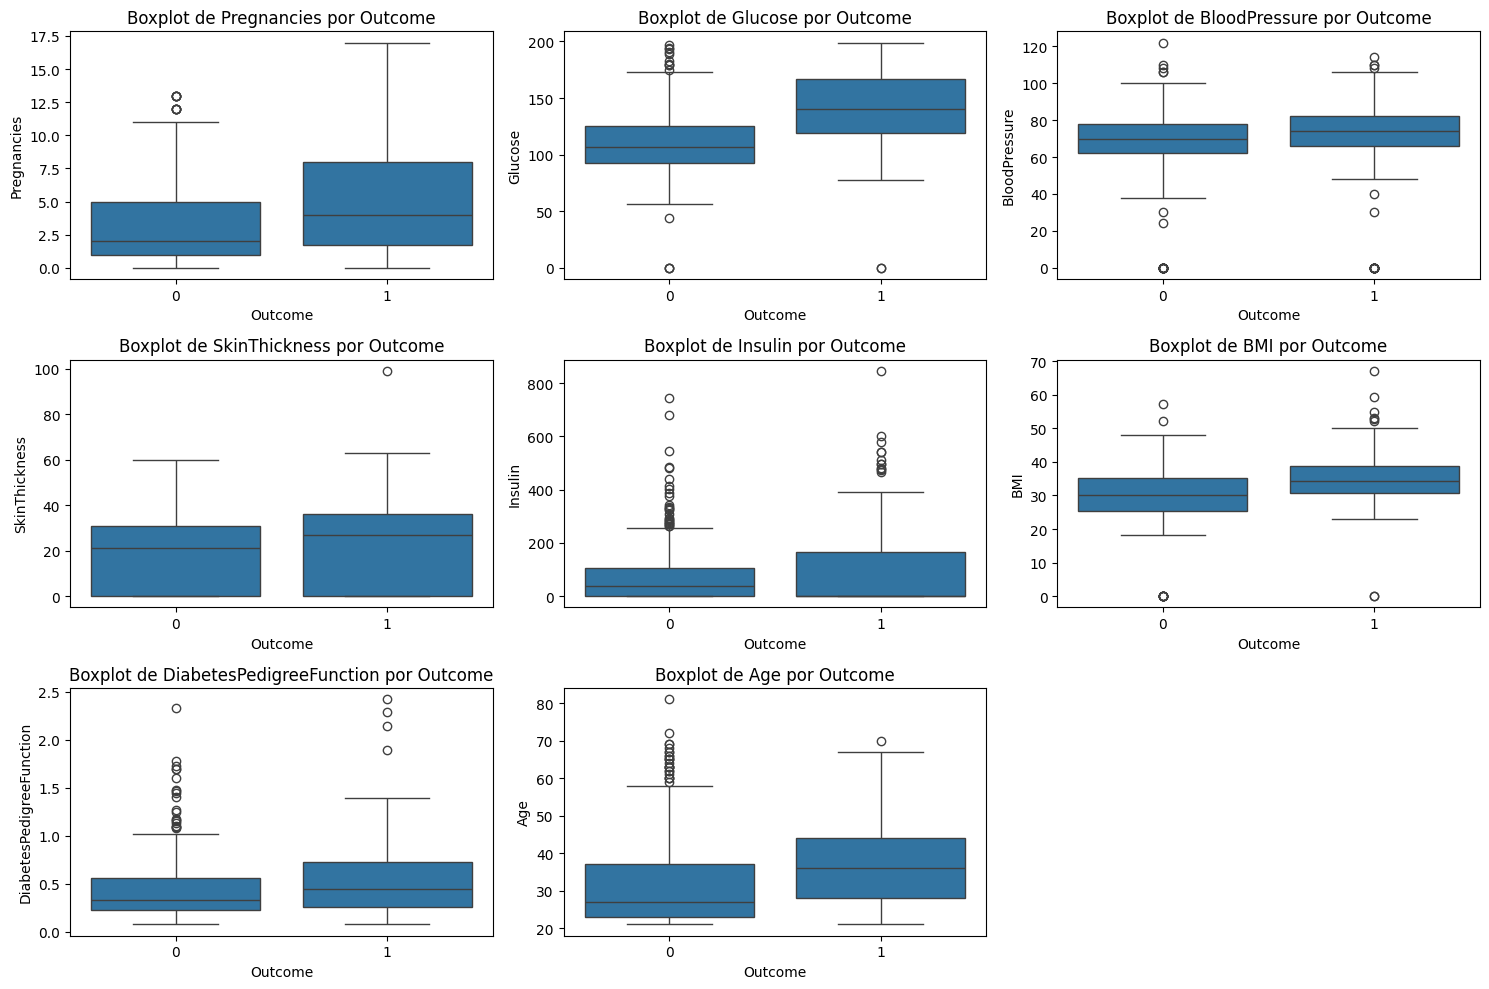

In [ ]:
# Defina as colunas contínuas (sem incluir 'Outcome')
continuous_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 10))

# Cria um boxplot para cada coluna
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)  # Ajusta para exibir vários gráficos (3 linhas e 3 colunas)
    sns.boxplot(x='Outcome', y=col, data=dataset)
    plt.title(f'Boxplot de {col} por Outcome')

plt.tight_layout()
plt.show()


Usando o boxplot, conseguimos confirmar as principais colunas que vimos anteriormente.

Dessa forma vamos usar as colunas BMI, Age, Pregnancies e Glucose para treinar nosso modelo

## Separando os dados para treinamento
Depois de ter verificado as principais colunas, vamos separar os dados para iniciar o treinamento do nosso modelo

In [ ]:
dataset_treino = dataset[['Age', 'BMI', 'Pregnancies', 'Glucose', 'Outcome']]

# Separando os dados para X e y
X = dataset_treino.drop('Outcome', axis=1)
y = dataset_treino['Outcome']


### Verificando nossa variável X

A nossa variável X vai conter os dados que iremos usar para treinar nosso modelo

In [ ]:
X.sample(10)

,Age,BMI,Pregnancies,Glucose
674,68,35.6,8,91
636,48,28.8,5,104
631,24,34.5,0,102
743,45,32.7,9,140
138,29,31.2,0,129
562,24,37.6,1,87
152,42,34.3,9,156
397,22,34.3,0,131
387,45,43.3,8,105
69,27,28.9,4,146


### Verificando nossa variável y

Nossa variável y é a coluna alvo, ou seja, a coluna na qual nosso modelo tentará predizer

In [ ]:
y.sample(10)

,Outcome
568,0
98,0
671,0
366,1
719,1
718,0
662,1
32,0
402,1
679,0


### Uso do train_test_split para treino

Usando a função train_test_split, separamos os dados para treinamento e teste do nosso modelo sendo que a porcentagem de teste ficou em 20%

In [ ]:
# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento do modelo

Vamos utilizar nossos dados para treinar usando 3 métodos diferentes: os algoritmos RandomForestClassifier, DecisionTreeClassifier e uma rede neural. Ao final do notebook Jupyter, iremos comparar a acurácia de cada um deles para determinar qual obteve o melhor desempenho.

### Algoritmo RandomForestClassifier

O RandomForestClassifier é um algoritmo de treinamento de máquinas usando o conceito de florestas aleatórias.

In [ ]:
# Instanciando o modelo
modeloRFC = RandomForestClassifier(random_state=42)

In [ ]:
# Treinando o modelo
modeloRFC.fit(X_train, y_train)
y_pred = modeloRFC.predict(X_test)

In [ ]:
# Calculando a acuracia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'A porcentagem de acurácia é de {(acuracia * 100):.2f}%')

A porcentagem de acurácia é de 75.32%


### Algoritmo DecisionTreeClassifier
O DecisionTreeClassifier é um algoritmo de aprendizado supervisionado que resolve problemas de classificação.

In [ ]:
# Importando e instanciando o modelo
from sklearn import tree
modeloDTC = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
# Treinando o modelo
modeloDTC.fit(X_train, y_train)
y2_pred = modeloDTC.predict(X_test)

In [ ]:
# Calculando a acuracia
acuracia2 = accuracy_score(y_test, y2_pred)
print(f'A porcentagem de acurácia é de {(acuracia2 * 100):.2f}%')

A porcentagem de acurácia é de 70.13%


### Treinamento com Rede Neural

Uma rede neural é um algoritmo de aprendizado de máquina inspirado no funcionamento do cérebro humano. Ela é composta por várias camadas de neurônios artificiais, que são nós interconectados.

In [ ]:
# Instânciando uma rede neural
modeloRN = Sequential()

In [ ]:
# Verificando a quantidade de input de entrada

# A quantidade de colunas no X (os dados de entrada) é extremamente importante ao treinar uma rede neural,
# pois define o número de features (características) que o modelo vai processar
X_train.shape

(614, 4)

#### Padronizar os dados e Definição de estrutura

Tivemos que fazer algumas mudanças nesse modelo para ele ter uma boa acuracia, vou explicar todas essas mudanças

1. Usamos o **StandardScaler** para normalizar os dados e nossa rede neural aprender melhor. Segundo a própria documentação do StandardScaler ele "padroniza as features removendo a média e a escala a uma variância a uma unidade".

2. Usamos o **BatchNormalization** para normalizar a a saída da camada anterior, acelerando o treinamento e melhorando a estabilidade.  Ele funciona calculando a média e a variação das ativações de cada recurso no minilote e, em seguida, normalizando as ativações usando essas estatísticas

3. Dropout desativa aleatoriamente 50% dos neurônio da camada, evitando o overfitting, que seria quando o algoritmo se adapta excessivamente levando a um modelo que não consegue fazer previsões ou conclusões com outros dados que não sejam os de treinamento

Foi importando fazer essas mudanças pois antes nosso modelo estava batendo entre 60-65% de acurária e após isso, ele ficou entre 70-76% de acurácia.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

modeloRN.add(Dense(units=256, activation='relu', input_dim=4))
modeloRN.add(BatchNormalization())
# Dropout desativa aleatóriamente 50% dos neurônio dessa camada, evitando o overfitting
modeloRN.add(Dropout(0.5))

# Hidden layer 1
modeloRN.add(Dense(units=128, activation='relu'))
modeloRN.add(BatchNormalization())
modeloRN.add(Dropout(0.5))

# Hidden layer 2
modeloRN.add(Dense(units=64, activation='relu'))
modeloRN.add(BatchNormalization())
modeloRN.add(Dropout(0.5))

# Hidden layer 3
modeloRN.add(Dense(units=32, activation='relu'))
modeloRN.add(BatchNormalization())
modeloRN.add(Dropout(0.5))

# Camada de saída
# Como é binário usamos 1 unidade e o sigmoid
modeloRN.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar o modelo
modeloRN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#relatório da arquitetura
modeloRN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 256)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 256)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 274,950 (1.05 MB)

 Trainable params: 269,190 (1.03 MB)

 Non-trainable params: 5,760 (22.50 KB)

In [ ]:
# Treinar o modelo com os dados normalizados
historico = modeloRN.fit(X_train_scaled, y_train,
                         epochs=150,
                         batch_size=32)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.5034 - loss: 1.4368
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6110 - loss: 1.2346
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6196 - loss: 1.1984
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6232 - loss: 1.1772
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6971 - loss: 1.0631
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6841 - loss: 1.0669
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6506 - loss: 1.1140
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6498 - loss: 1.0985
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6541 - loss: 1.1239
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6597 - loss: 1.1200
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7152 - loss: 1.0649
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/ste

In [ ]:
# Verificando a acuracia e loss
historico.history

{'accuracy': [0.5325732827186584,
  0.5993485450744629,
  0.628664493560791,
  0.6335504651069641,
  0.6693810820579529,
  0.6693810820579529,
  0.6710097789764404,
  0.6791530847549438,
  0.6661238074302673,
  0.6596091389656067,
  0.6921824216842651,
  0.6726384162902832,
  0.6775244474411011,
  0.6596091389656067,
  0.6954397559165955,
  0.6905537247657776,
  0.6775244474411011,
  0.6872963905334473,
  0.7100977301597595,
  0.6954397559165955,
  0.6498371362686157,
  0.7133550643920898,
  0.6986970901489258,
  0.6791530847549438,
  0.7035830616950989,
  0.6677524447441101,
  0.6856677532196045,
  0.708469033241272,
  0.6824104189872742,
  0.6710097789764404,
  0.6661238074302673,
  0.6921824216842651,
  0.6856677532196045,
  0.6954397559165955,
  0.6986970901489258,
  0.6954397559165955,
  0.7296416759490967,
  0.7100977301597595,
  0.7117263674736023,
  0.7133550643920898,
  0.6970683932304382,
  0.7166123986244202,
  0.708469033241272,
  0.7052116990089417,
  0.7312703728675842,
 

## Conclusão

Com base nos resultados obtidos, podemos concluir que, para este dataset, a rede neural não apresentou o melhor desempenho, mas ficou próxima dos outros dois algoritmos:

1. **RandomForestClassifier** com 75% de acurácia
2. **Rede Neural** com 73% de acurácia
3. **DecisionTreeClassifier** com 72% de acurácia
